# Project Name : - Flight Fare Prediction


## 1) Problem statement.

* This dataset comprises of Flight Price taken from Kaggle 
* Link of the dataset is as follows :- https://www.kaggle.com/datasets/nikhilmittal/flight-fare-prediction-mh
* A user can predict the price of the Flight Fare based on input features.
* Prediction results can be useful for traveller to get suggested price

## 2) Data Collection.
* This dataset comprises of Flight Fare data taken from Kaggle
* The data consists of 11 column and 10683 rows.

### 2.1 Import Data and Required Packages

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

**Loading the Flight Fare Data**

In [79]:
df=pd.read_excel("Data_train.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


**Show Top 5 Records**

In [80]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


**Shape of the DataSet**

In [81]:
df.shape

(10683, 11)

**Summary of the DataSet**

In [82]:
# df.describe() Display summary statistics for a dataframe which has numerical columns
# since in this case we have only 1 numercial column df.describe() will come only for these one column
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [83]:
#Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## 3. EXPLORING DATA

In [84]:
# define numerical & categorical columns
numeric_features=[feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features=[feature for feature in df.columns if df[feature].dtype == 'O']

#print columns
print(f'We have {len(numeric_features)} numerical features :{numeric_features}')
print(f'We have {len(categorical_features)} categorical features :{categorical_features}')      

We have 1 numerical features :['Price']
We have 10 categorical features :['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info']


### Feature Information
* **Airline:** Name of the Airline from which the Ticket is Booked.
* **Date_of_Journey:** Date of Journey of the Traveller.
* **Source:** Source from which the Airline Would Departure.
* **Destination:** Destination to Which Airline Would Arrive.
* **Route:** Route of the Airline from Source to Destination.  
* **Dep_Time:** Time at which Flight Would Departure from the Source.
* **Arrival_Time:** Time at which Flight Would Arrive at the Destination. 
* **Duration:** Duration that Airline Takes to fly from Source to Destination.     
* **Total_Stops:** Total No of Stops that Airline takes Between Source and Destination.
* **Additional_Info:** Any Additional Info about the Airline.
* **Price:** Fare of the Ticket to fly from Source to Destination.

In [85]:
# proportion of count data of each categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print('----------------------------')

Jet Airways                          36.029205
IndiGo                               19.217448
Air India                            16.399888
Multiple carriers                    11.195357
SpiceJet                              7.657025
Vistara                               4.483759
Air Asia                              2.986053
GoAir                                 1.815969
Multiple carriers Premium economy     0.121689
Jet Airways Business                  0.056164
Vistara Premium economy               0.028082
Trujet                                0.009361
Name: Airline, dtype: float64
----------------------------
18/05/2019    4.717776
6/06/2019     4.708415
21/05/2019    4.652251
9/06/2019     4.633530
12/06/2019    4.614809
9/05/2019     4.530563
21/03/2019    3.959562
15/05/2019    3.791070
27/05/2019    3.575775
27/06/2019    3.323037
24/06/2019    3.285594
1/06/2019     3.201348
3/06/2019     3.117102
15/06/2019    3.070299
24/03/2019    3.023495
6/03/2019     2.883085
27/03/201

## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

### Categorical Features

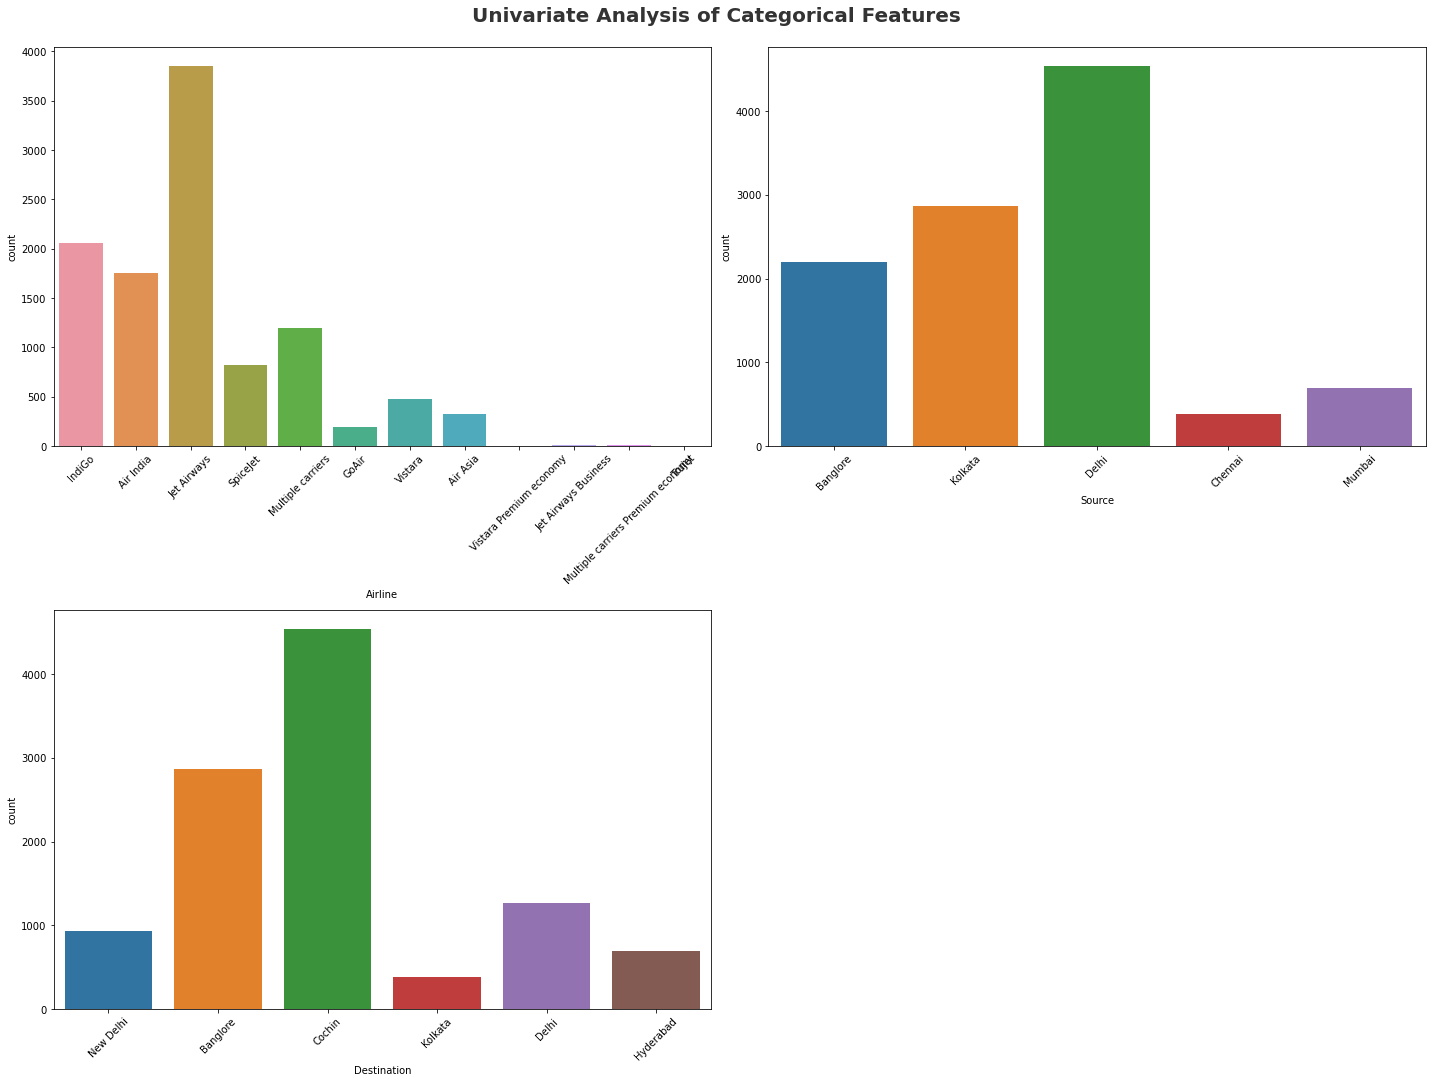

In [86]:
# categorical columns
plt.figure(figsize=(20,15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = [ 'Airline','Source', 'Destination']
for i in range(0, len(cat1)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

## Multivariate Analysis

* Multivariate analysis is the analysis of more than one variable.

### Check Multicollinearity for Categorical features

* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e Price**

In [88]:
from scipy.stats import chi2_contingency
chi2_test=[]
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['Price'],df[feature]))[1] <0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result=pd.DataFrame(data=[categorical_features,chi2_test]).T
result.columns=['Column','Hypothesis Result']
result

,Column,Hypothesis Result
0,Airline,Reject Null Hypothesis
1,Date_of_Journey,Reject Null Hypothesis
2,Source,Reject Null Hypothesis
3,Destination,Reject Null Hypothesis
4,Route,Reject Null Hypothesis
5,Dep_Time,Reject Null Hypothesis
6,Arrival_Time,Reject Null Hypothesis
7,Duration,Reject Null Hypothesis
8,Total_Stops,Reject Null Hypothesis
9,Additional_Info,Reject Null Hypothesis


### Checking Null Values

In [89]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

**Dropping  the rows which has null values**

In [90]:
df.dropna(inplace=True)

**Now there are no null values**

In [91]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Initial Analysis Report

**Report**
* **Jet Airways has highest customer footfall followed by Indigo and Air India .**
* **Jet Airways has a market Share of 36.03 % followed by Indigo which has a market share of 19.22 % and Air India Which has market share of 16.40 % .**
* **Delhi has the highest footfall for source and Cochin has the highest footfall for Destination .**

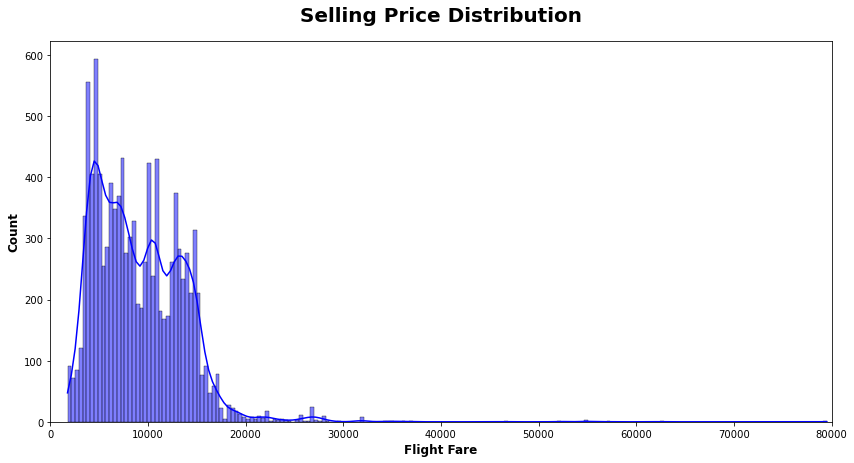

In [92]:
plt.subplots(figsize=(14,7))
sns.histplot(df.Price, bins=200, kde=True, color = 'b')
plt.title("Selling Price Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Flight Fare", weight="bold", fontsize=12)
plt.xlim(0,80000)
plt.show()

* From the chart it is clear that the Target Variable is  Skewed

### 4.2 Top 10 Aviation Companies whose flight tickets are sold the most  ?

In [93]:
df.Airline.value_counts()[0:10]

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Name: Airline, dtype: int64

### Most Sold Tickets are of Jet Airways Airline

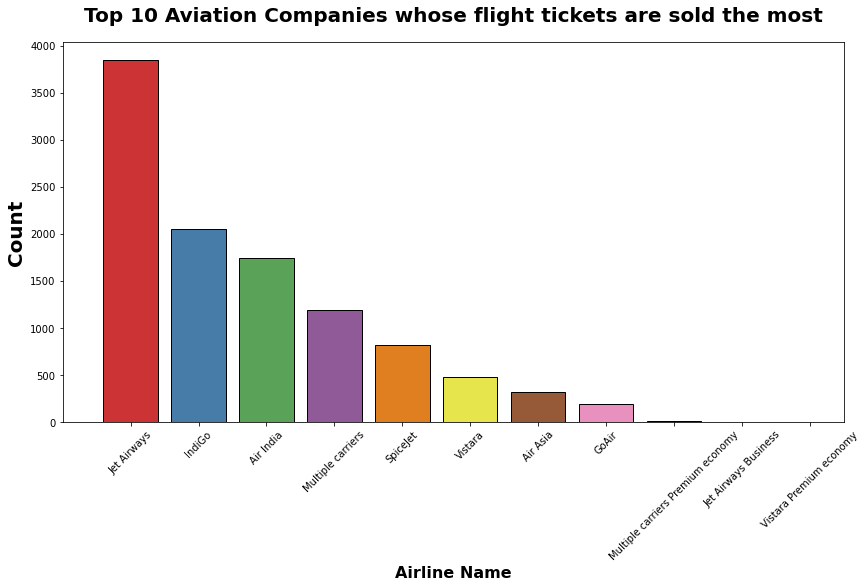

In [94]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Airline", data=df,ec = "black",palette="Set1",order = df['Airline'].value_counts().index)
plt.title("Top 10 Aviation Companies whose flight tickets are sold the most", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Airline Name", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

### Check mean price of Jet Airways whose flight tickets are sold the most

In [95]:
jet_airways = df[df['Airline'] == 'Jet Airways']['Price'].mean()
print(f'The mean price of Jet Airways Flight Tickets  is {jet_airways:.2f} Rupees')

The mean price of Jet Airways Flight Tickets  is 11643.92 Rupees


**Report:**
* As per the Chart these are top 10 aviation companies whose tickets are sold the most.
* Of the total flight tickets sold Jet Airways has the highest share followed by Indigo .
* Mean Price of Jet Airways Flight Ticket  is Rs 11,643.92.
* This Feature has impact on the Target Variable.

In [96]:
## Costliest Aviation Companies and Costliest Flight Tickets

In [97]:
aviation_company_airline = df.groupby('Airline').Price.max()
aviation_company= aviation_company_airline.to_frame().sort_values('Price',ascending=False)[0:10]
aviation_company

,Price
Airline,
Jet Airways Business,79512
Jet Airways,54826
Multiple carriers,36983
Air India,31945
SpiceJet,23267
GoAir,22794
IndiGo,22153
Vistara,21730
Multiple carriers Premium economy,14629


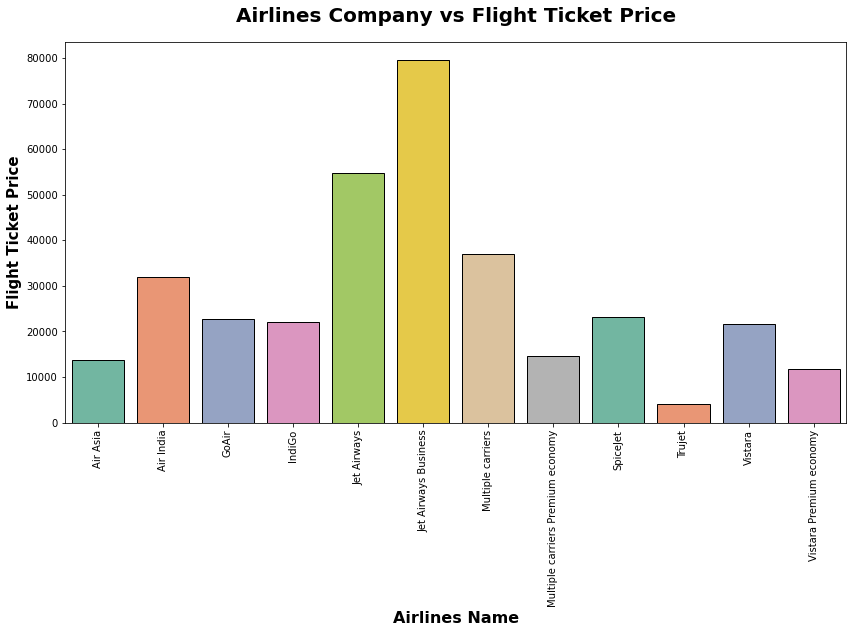

In [98]:
plt.subplots(figsize=(14,7))
sns.barplot(x=aviation_company_airline.index, y=aviation_company_airline.values,ec = "black",palette="Set2")
plt.title("Airlines Company vs Flight Ticket Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Flight Ticket Price", weight="bold", fontsize=15)
plt.xlabel("Airlines Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

**Report:**
* Costliest Flight Tickets Sold is of Jet Airways Business .
* Second Most Costliest Flight Tickets Sold is of Jet Airways .
* As can be seen, the airline’s name is important. The most expensive option is ‘JetAirways Business.’ The cost of other carriers varies as well.
* We’ll use one-hot encoding to handle the Airline variable because it’s Nominal Categorical Data (airline names have no order of any kind).

# **Extracting Date & Month from Date of Journey Column**

### Converting into Datetime:

* We are going to extract the date and month from the date of the journey .
* For this, we require pandas to_datetime to convert the object data type to DateTime data type .
* .dt.day the method will extract only the day from the date.
* .dt.month the method will extract only the month of that date.


# Date

In [99]:
df["journey_Date"]= pd.to_datetime(df['Date_of_Journey'], format= "%d/%m/%Y").dt.day

# Month

In [100]:
df["journey_Month"]= pd.to_datetime(df['Date_of_Journey'], format= "%d/%m/%Y").dt.month

**Checking the New Date & Month Column**

In [101]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


# Since we have extracted Date of Journey column into Date & Month, Now we can drop it as Original Date of Journey column is of no use.

In [102]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)

## Departure time is when a plane leaves the Source . 
## Similar to Date of Journey we can extract values from Departure Time
## So we will be extracting Hour & Minutes from Departure Time Column

In [103]:
# Extracting Hours
df['Dep_hour']=pd.to_datetime(df['Dep_Time']).dt.hour  #pd.to_datetime

#Extracting minutes
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute

#Now we will drop the dep_time, no use
df.drop(['Dep_Time'],axis=1,inplace=True)

## Arrival time is when a plane reaches the destination. 
## Similar to Date of Journey we can extract values from Arrival Time
## So we will be extracting Hour & Minutes from Arrival Time Column

In [104]:
# Extracting Hours
df['Arrival_hour']=pd.to_datetime(df['Arrival_Time']).dt.hour  #pd.to_datetime

#Extracting minutes
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute

#Now we will drop the dep_time, no use
df.drop(['Arrival_Time'],axis=1,inplace=True)

## Let's look at the data.

In [105]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


## “Duration” column:
## Here we are trying to extract the hours and minutes from the feature “duration”.

In [106]:
# Assigning and converting Duration column into list to extract hours ans minutes seperately
duration = list(df["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) !=2:  # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

## Adding “duration_hours” and “duration_mins” list to df data frame and dropping the column “duration” from it.

In [107]:
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

#we will remove the Durtaion column
df.drop(['Duration'],axis=1,inplace=True)

**Handling Categorical Data:**

**Airline, Source, Destination, Route, Total_Stops, Additional_info are the categorical variables we have in our data.**

**Let’s handle each one by one.**

**Nominal data → are not in any order → OneHotEncoder is used in this case**

**Ordinal data → are in order → LabelEncoder is used in this case**

**Trying to find out unique values in column Airline and counts of the unique values as well.**

**One-hot encoding:**

**Another typical technique for dealing with categorical information is, one-hot encoding. It simply adds more characteristics to the categorical feature dependent on the number of unique values. Every category’s unique value will be added as a feature.**

**The method of constructing dummy variables is known as one-hot encoding.**

**Each category is represented as a single-hot vector in this encoding technique.** 

# **Boxplots**

**Airline vs Price:**

* Let’s see how the Airline variable is related to the Price variable.

# Airline vs Price

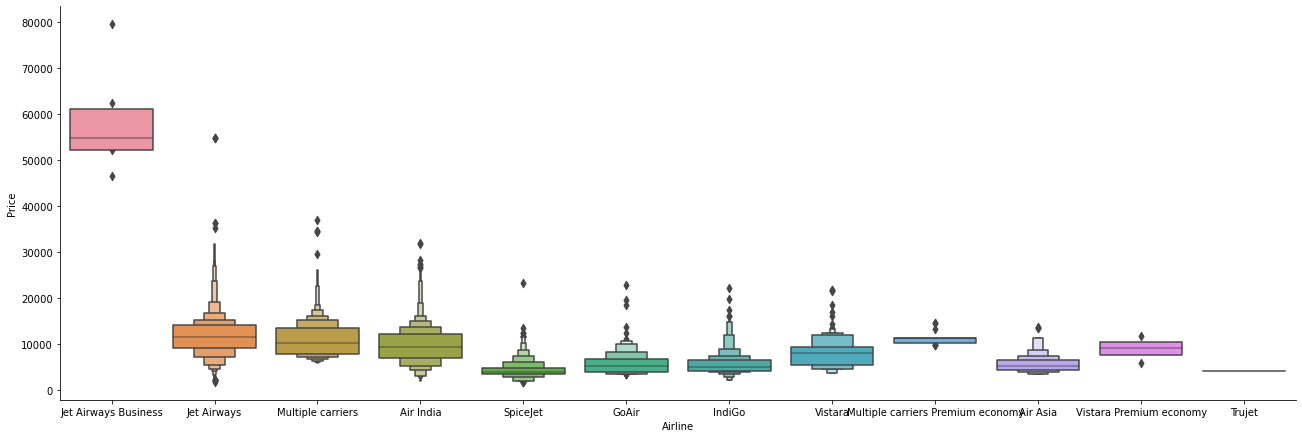

In [108]:

sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

**From the Above we can see that Jet Airways Business has premium flight fares as compared to other Airlines**

In [109]:
#OneHotEncoding -----> Nominal data
Airline = df[["Airline"]]
Airline = pd.get_dummies(df['Airline'],drop_first=False)
Airline.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


**Source vs Destination:**
* Again, the variables ‘Source’ and ‘Destination’ are Nominal Categorical Data. To deal with these two variables, we’ll employ One-Hot encoding once more.

**Source vs Price**

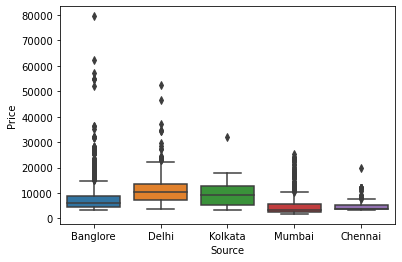

In [110]:
sns.boxplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False))
plt.show()

**From the Above we can see that Flights Originating From Banglore has high flight fares as compared to other sources from where flights are originating**

In [111]:
#OneHotEncoding -----> Nominal data
Source = df[["Source"]]
Source = pd.get_dummies(df['Source'],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [112]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = df[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


**Variable route:**
* The journey’s path is represented by the route variable.
* I opted to remove this field because the ‘Total Stops’ value captures whether the flight is direct or connected.

In [113]:
# droping column, because Additinal_info has since 80 % has no information 
# Route---> is related to no of stops
df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

**Total_Stops Variable:**
* Non-stop refers to a flight with no stops, i.e. a straight flight. It is self-evident that other values have the same meaning. We can see that it’s Ordinal Categorical Data, thus we’ll use LabelEncoder to deal with it.

In [114]:
df['Total_Stops'].value_counts()
# As this is case of Ordinal Categorical type we perform LabelEncoder
#we replace the values in key values 
df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
df.head()

,Airline,Source,Destination,Total_Stops,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


**Correlation:**
* Correlation is a technique for determining the link between two variables, which is useful in real life since it allows us to forecast the value of one variable using other factors that are connected with it. Because two variables are involved, it is a sort of bivariate statistic.

<AxesSubplot:>

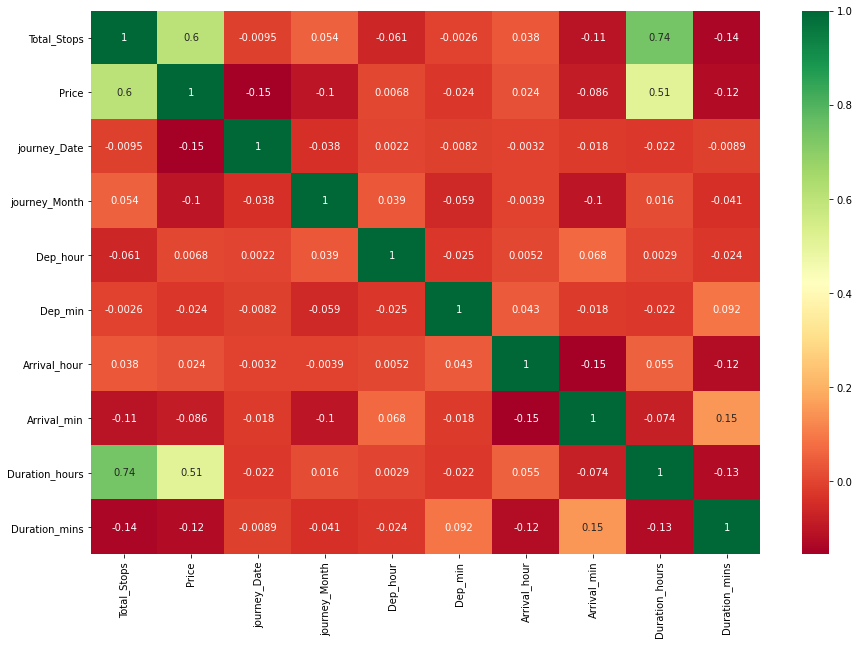

In [115]:
# Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot = True, cmap = "RdYlGn")

**Final Dataframe:**
* Now we’ll join all of the One-hot and Label-encoded features to the original data frame to make the final data frame. We’ll also get rid of the old variables that we used to create the new encoded variables.

In [116]:
#Concatenate dataframe --> df+ Airline + Source + Destination
data_train=pd.concat([df,Airline , Source, Destination],axis=1)
# we have drop the varibles
data_train.drop(["Airline","Source","Destination"],axis=1,inplace=True)
data_train.head()

,Total_Stops,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


**As a result, the final data frame has 30 variables, including the dependent variable ‘Price.’ For training, there are only 29variables.**

**Test Data:**

**We are going to repeat all these steps for test data as well.**

**Importing test data:**

In [117]:
test_data= pd.read_excel("Test_Set.xlsx")
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [118]:
# Preprocessing


print(test_data.info())


test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)




print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)




print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64
Airline
--------------------------------------------------------------------------

# **5. Now we Will Build a Machine Learning Model Using Random Forest Algorithm**

In [119]:
x= data_train[['Total_Stops', 'journey_Date', 'journey_Month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
x.head()

,Total_Stops,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [120]:
y=data_train['Price']

**Feature importance:**
* In machine learning, the purpose of feature selection is to discover the best set of characteristics that allows one to develop usable models of the phenomena being examined.

In [121]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

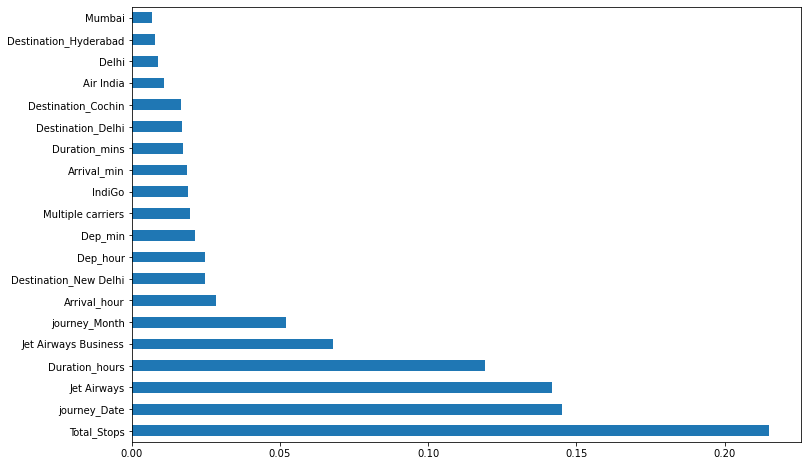

In [122]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [123]:
# import library
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#Deifne feature selection
fs=SelectKBest(score_func=chi2)  
# Applying feature selection
X_selected=fs.fit(x,y)

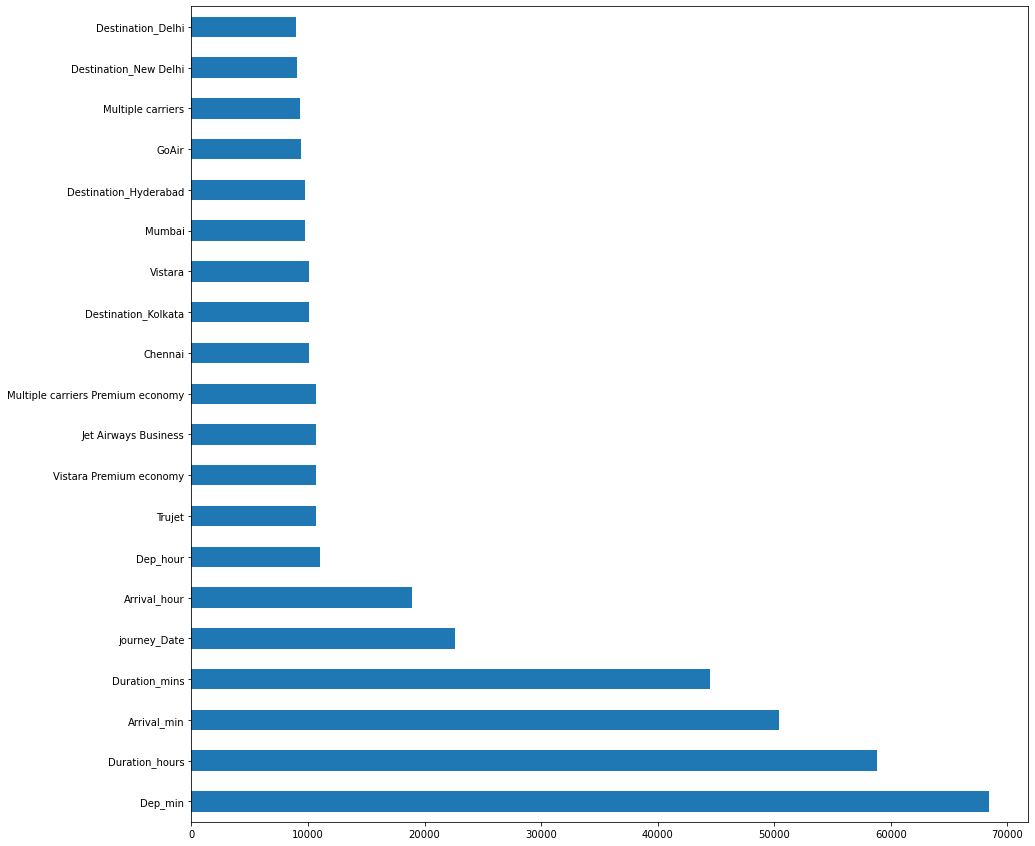

In [124]:
plt.figure(figsize=(15,15))
feat_importances = pd.Series(X_selected.scores_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [125]:
#Splitting the Data into Train & Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=32)

In [126]:
from sklearn.ensemble import RandomForestRegressor
random_forest=RandomForestRegressor()

In [127]:
random_forest.fit(x_train,y_train)

RandomForestRegressor()

**R2 SCORE**

In [128]:
random_forest.score(x_test,y_test)

0.8162498117560149

In [129]:
random_forest.score(x_train,y_train)

0.9551376029504599

In [130]:
y_pred=random_forest.predict(x_test)

<AxesSubplot:xlabel='Price', ylabel='Density'>

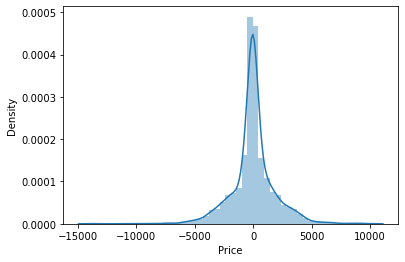

In [131]:
#Plotting the error graph and should be mean=0
sns.distplot(y_test-y_pred,kde=True)

**With an R2 score of 81 percent, With this model, we can also calculate the minimal values for mean absolute error, mean squared error, and root mean squared error (regression metrics). We will try to improve the accuracy by doing hyperparameter tuning.**

In [132]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1177.9645968702143
MSE: 3452093.589586994
RMSE: 1857.9810519989148


Text(0, 0.5, 'prediction')

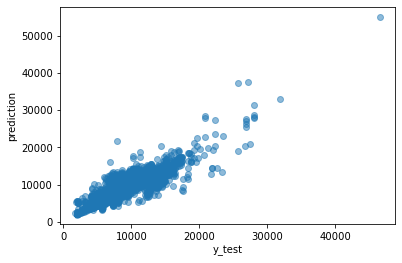

In [133]:
#Plotting scatter graph to check linear relations
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('prediction')

#### Performing Hyperparameter Tuning for better Accuracy, it can be done using:-
- RandomizedSearchCV
- GridSearchCV

**Here we will be using RandomizedSearchCV**

In [134]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 8)]
min_samples_split = [2, 5, 10, 15, 100, 120, 150, 200, 250]
min_samples_leaf = [1, 2, 5, 10,15,25,30,35]

In [135]:
random_grid_params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [136]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split

In [137]:
#random_search=RandomizedSearchCV(estimator=random_forest,param_distributions=random_grid_params,cv=5,n_jobs=-1,verbose=3,scoring='neg_mean_squared_error', n_iter = 10,)
#random_search

In [138]:
#random_search.fit(x_train,y_train)

In [139]:
#let's see the best parameters as per our grid search
#random_search.best_params_

**We will pass these parameters into our random forest classifier.**

In [140]:
random_forest_regresor=RandomForestRegressor(n_estimators=300,
 min_samples_split= 10,
 min_samples_leaf= 2,
 max_features= 'auto',
 max_depth= 15)

In [141]:
random_forest_regresor.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=10,
                      n_estimators=300)

In [142]:
random_forest_regresor.score(x_train,y_train)

0.8975589923239412

**R2 SCORE**

In [143]:
random_forest_regresor.score(x_test,y_test)

0.8442929141484197

In [144]:
prediction=random_forest_regresor.predict(x_test)

<AxesSubplot:xlabel='Price', ylabel='Density'>

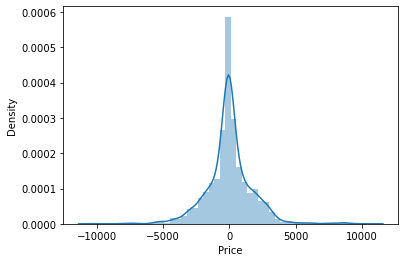

In [145]:
#Plotting the error graph and should be mean=0
sns.distplot(y_test-prediction,kde=True)

Text(0, 0.5, 'prediction')

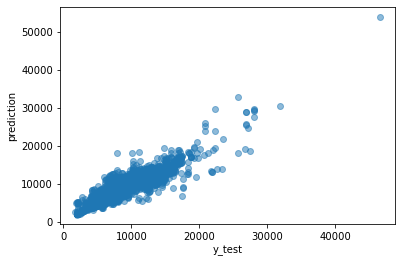

In [146]:
#Plotting scatter graph to check linear relations
plt.scatter(y_test,prediction,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('prediction')

In [147]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1144.213799091965
MSE: 2925251.059921607
RMSE: 1710.3365341129818


**After hyper tuning, the R2 score for random forest Regressor is 84 percent, whereas, before hyper tuning, the R2 score for random forest Regressor was 81 percent. The value of MAE drops as well, indicating that we were successful in tunning our model.**

**Conclusion:**
* So, we have used a random forest model for this data and improved accuracy by doing hyperparameter tuning.
* As a result, we were able to successfully train our regression model, the ‘Random forest model,’ to forecast fares of flight tickets with an R2 score of 84 percent and complete the required work.

#### Model Saving in Pickle Format

In [148]:
import pickle
file = open('flight_fare_pred.pkl', 'wb')
pickle.dump(random_forest_regresor, file)

#### Loading the  Model Saved in Pickle Format

In [149]:
model = open('flight_fare_pred.pkl','rb')
flight_fare_pedictor = pickle.load(model)

###  Predicting Using the Loaded Model

In [150]:
flight_fare_pedictor.score(x_test,y_test)

0.8442929141484197

In [151]:
x_test

,Total_Stops,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
8396,2,24,6,18,20,4,25,10,5,0,...,0,0,1,0,0,1,0,0,0,0
9284,1,9,6,17,30,12,35,19,5,0,...,0,0,1,0,0,1,0,0,0,0
10609,0,12,5,12,0,13,30,1,30,0,...,0,0,0,0,1,0,0,1,0,0
10229,0,3,3,19,35,22,5,2,30,0,...,0,0,0,1,0,0,0,0,0,0
3874,1,27,3,2,15,15,30,13,15,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5803,0,24,3,23,30,2,20,2,50,0,...,0,0,0,0,0,0,0,0,0,1
5663,1,6,5,11,35,18,50,7,15,0,...,0,0,0,1,0,0,0,0,0,0
8332,0,27,6,11,30,14,5,2,35,0,...,0,0,0,1,0,0,0,0,0,0
10453,2,24,6,9,40,12,35,26,55,0,...,0,0,1,0,0,1,0,0,0,0


In [152]:
y_prediction = flight_fare_pedictor.predict(x_test)

In [153]:
y_prediction

array([13539.55130514, 11448.95305979,  3150.64320316, ...,
        4922.36214033, 11228.92875909,  7586.86763133])